In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# EDA

**Distribuição da variável alvo (Churn)** 
Clientes que abandonaram o serviço no último mês (coluna Churn)


/tmp/ipykernel_17/3229865273.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data = df, palette='viridis')


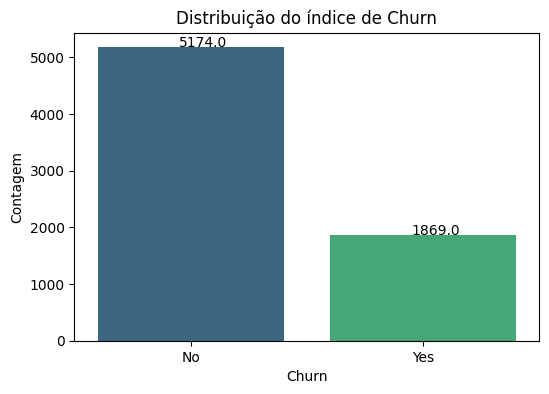

In [6]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Churn', data = df, palette='viridis')

plt.title('Distribuição do índice de Churn')
plt.xlabel('Churn')
plt.ylabel('Contagem')

# Adicionar rotulos nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.35, p.get_height() + 5))



**Churn por Tipo de Contrato**

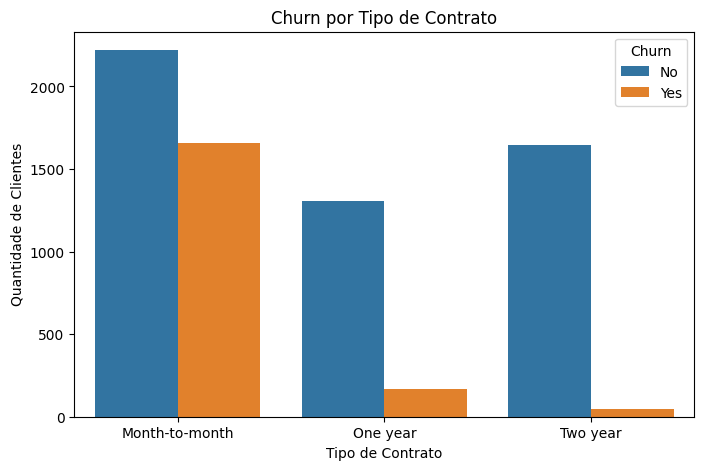

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue="Churn", data = df)

plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel("Quantidade de Clientes")
plt.legend(title="Churn", loc="upper right")

**Churn por Tempo de Cliente e Valor Pago**

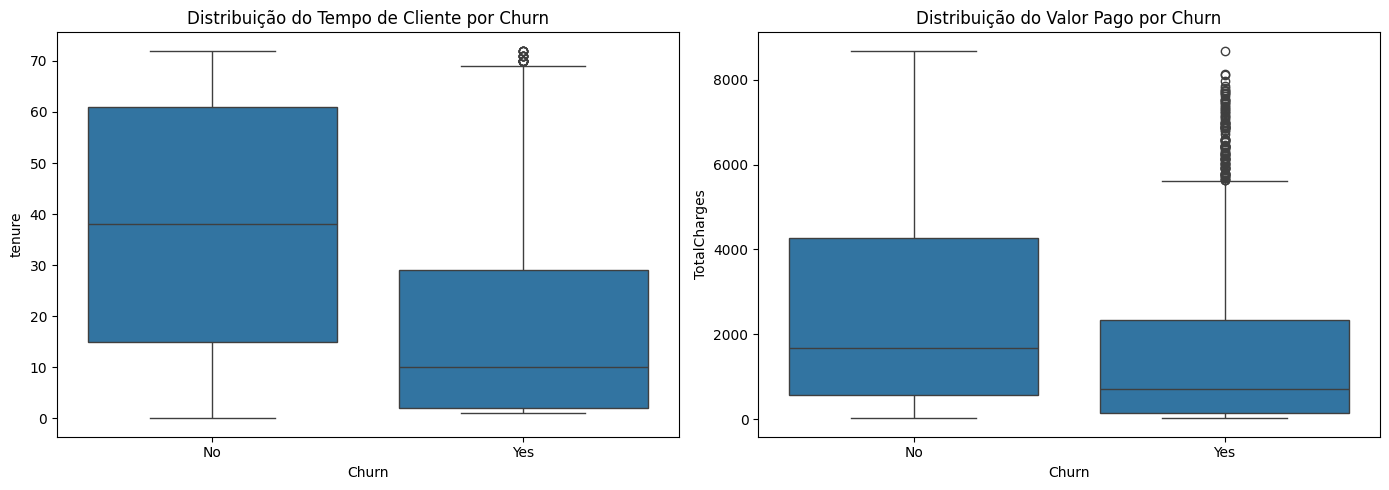

In [8]:
fig, axes = plt.subplots(1,2, figsize=(14,5))
sns.boxplot(x="Churn", y='tenure', data=df, ax=axes[0])
axes[0].set_title('Distribuição do Tempo de Cliente por Churn')

sns.boxplot(x='Churn', y='TotalCharges', data=df, ax=axes[1])
axes[1].set_title("Distribuição do Valor Pago por Churn")

plt.tight_layout()



**Correlação entre Variáveis**

Text(0.5, 1.0, 'Mapa de Correlação')

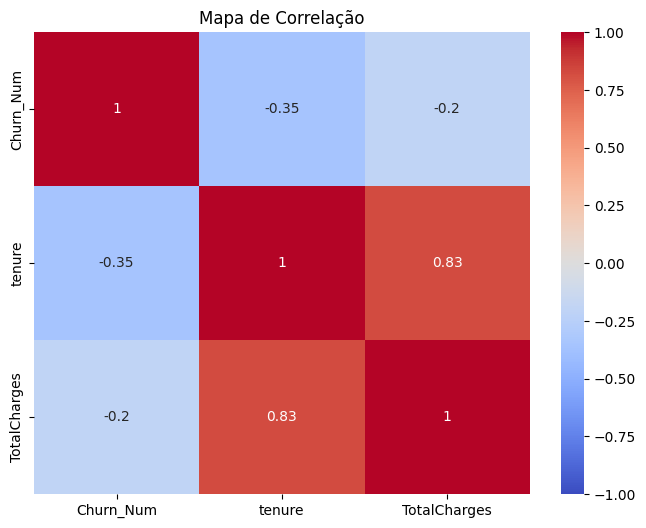

In [9]:
df_corr = df.copy()
df_corr['Churn_Num'] = df_corr['Churn'].apply(lambda x:1 if x=='Yes' else 0)

cols = ['Churn_Num', 'tenure', 'TotalCharges']
matriz_correlacao = df_corr[cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Correlação')


In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df['TotalCharges'].fillna(0, inplace=True)
df.isnull().sum()

/tmp/ipykernel_17/2526459145.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Identificando e Tratando Outliers**

In [12]:
def limites_outliers(coluna):
    Q1 = coluna.quantile(0.25)
    Q3 = coluna.quantile(0.75)
    IQR = Q3-Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return limite_inferior, limite_superior

lim_inf, lim_sup = limites_outliers(df['TotalCharges'])

In [13]:
print(f"Limites para Valor Pago: {lim_inf:.2f} a {lim_sup:.2f}")

Limites para Valor Pago: -4683.52 a 8868.67


In [14]:
outliers = df[(df['TotalCharges']<lim_inf) | df['TotalCharges']>lim_sup]
print(f"{len(outliers)} outliers")

0 outliers


# Data Preparation


In [15]:
bins = [0,12,24,48,72]
labels = ['0-1 Ano', '1-2 Anos', '2-4 Anos', '4-6 Anos']

df['Tenure_Faixa'] = pd.cut(df['tenure'], bins = bins, labels=labels, right =True)
df['Tenure_Faixa'] = pd.cut(df['tenure'], bins=[-1, 12, 24, 48, 73], labels=labels)
df['Tenure_Faixa'].value_counts()

Tenure_Faixa
4-6 Anos    2239
0-1 Ano     2186
2-4 Anos    1594
1-2 Anos    1024
Name: count, dtype: int64

In [16]:
df['Ticket_Medio_Historico'] = df.apply(lambda x: x['TotalCharges']/x['tenure'] if x['tenure'] > 0 else x['MonthlyCharges'], axis=1 )

In [17]:
genero = {'Female':1, 'Male':0}
binario = {'Yes':1, 'No':0}

colunas_binarias = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in colunas_binarias:
    df[col] = df[col].map(binario)

df['gender'] = df['gender'].map(genero)

In [18]:
cols_one_hot = ['InternetService', 'Contract', 'PaymentMethod', 'Tenure_Faixa']
df_final = pd.get_dummies(df, columns=cols_one_hot, drop_first = True)
bool_cols = df_final.select_dtypes(include=['bool']).columns
df_final[bool_cols] = df_final[bool_cols].astype(int)


In [19]:
if 'customerID' in df_final.columns:
    df_final.drop('customerID', axis=1, inplace=True)

In [20]:
cols_texto = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]
for col in cols_texto:
    df_final[col] = df_final[col].replace({'No internet service': 'No', 'No phone service': 'No'})

    df_final[col] = df_final[col].map({'Yes': 1, 'No': 0})

In [21]:
df_final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Faixa_1-2 Anos,Tenure_Faixa_2-4 Anos,Tenure_Faixa_4-6 Anos
0,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,34,1,0,1,0,1,...,0,0,1,0,0,0,1,0,1,0
2,0,0,0,0,2,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,45,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,2,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [22]:
df_final.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

# Modelagem

In [23]:
from sklearn.model_selection import train_test_split

X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Treino: {X_train.shape}, Teste: {X_test.shape}")

Treino: (4930, 27), Teste: (2113, 27)


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline

def executar_modelo(modelo, nome, X_train, y_train, X_test,y_test):
    pipe = Pipeline([('scaler', StandardScaler()), ('model', modelo)])

    #Treino
    pipe.fit(X_train, y_train)

    #teste
    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:,1]

    #Métricas
    print(f"{nome}")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC: {roc_auc_score(y_test,y_prob)}")

    #Matriz de coonfusão
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt ='d', cmap='Blues')
    plt.title(f"Matriz de confusão - {nome}")
    plt.show()

    return pipe

**Logistic Regression**

Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1552
           1       0.51      0.79      0.62       561

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.74      0.75      2113

ROC-AUC: 0.8439716678611463


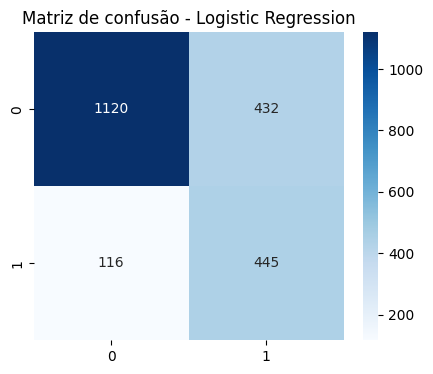

In [25]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

pipe_lr = executar_modelo(model_lr, 'Logistic Regression', X_train, y_train, X_test, y_test)

**Random Forest**

Random Forest
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1552
           1       0.64      0.46      0.53       561

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.77      0.79      0.77      2113

ROC-AUC: 0.8243787557197199


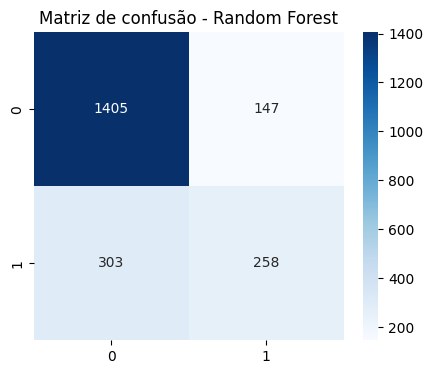

In [26]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)

pipe_rf = executar_modelo(model_rf, "Random Forest", X_train, y_train, X_test, y_test)

**Gradient Boosting**

Gradient Boosting
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1552
           1       0.64      0.49      0.55       561

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113

ROC-AUC: 0.8400804206406086


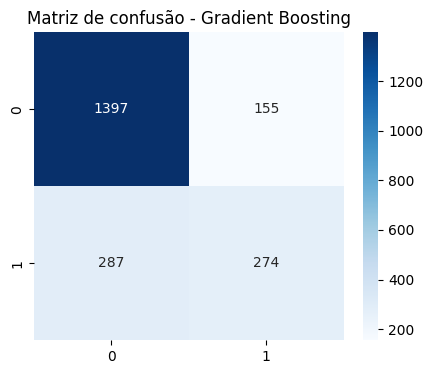

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(random_state=42)

pipe_gb = executar_modelo(model_gb, "Gradient Boosting", X_train, y_train, X_test, y_test)

**Cross-Validation**

In [28]:
from sklearn.model_selection import cross_val_score

modelos = [
    ('LogReg', LogisticRegression(class_weight='balanced', max_iter=1000)),
    ('RandomForest', RandomForestClassifier(class_weight='balanced')),
    ('GradBoost', GradientBoostingClassifier())
]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

print("Cross-Validation (Média ROC-AUC)")
for nome, model in modelos:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
    print(f"{nome}: {scores.mean():.4f} (+/- {scores.std():.4f})")

Cross-Validation (Média ROC-AUC)
LogReg: 0.8463 (+/- 0.0110)
RandomForest: 0.8308 (+/- 0.0135)
GradBoost: 0.8446 (+/- 0.0136)


# Avaliação dos modelos

In [29]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score

def get_metrics(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:,1]
    return{
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_prob)
    }

metricas_rf = get_metrics(pipe_rf, X_test, y_test)
metricas_lr = get_metrics(pipe_lr, X_test, y_test)
metricas_gb = get_metrics(pipe_gb, X_test, y_test)

df_metrics = pd.DataFrame([metricas_rf, metricas_lr, metricas_gb], index=['Random Forest', 'Logistic Reg', 'Gradient Boosting'])
df_metrics

,Recall,Precision,F1-Score,ROC-AUC
Random Forest,0.459893,0.637037,0.534161,0.824379
Logistic Reg,0.793226,0.507412,0.618915,0.843972
Gradient Boosting,0.488414,0.638695,0.553535,0.840080


**Simulação de Impacto Financeiro**

In [30]:
# Usando o pipe_lr (Regressão Logística) pois teve o melhor Recall 
# Criar DataFrame com os dados de Teste
df_impacto = X_test.copy()
df_impacto['Churn_Real'] = y_test
df_impacto['Churn_Predito'] = pipe_lr.predict(X_test)

df_impacto['MonthlyCharges'] = df.loc[X_test.index, 'MonthlyCharges']


alvo_campanha = df_impacto[df_impacto['Churn_Predito'] == 1]


qtd_alvo = len(alvo_campanha)
receita_em_risco = alvo_campanha['MonthlyCharges'].sum()

# Premissas da Simulação
taxa_retencao = 0.30      
custo_campanha = 5.00      
desconto_oferecido = 0.10  

clientes_salvos = int(qtd_alvo * taxa_retencao)


receita_salva_mensal = clientes_salvos * alvo_campanha['MonthlyCharges'].mean()


custo_total_campanha = qtd_alvo * custo_campanha


custo_descontos = receita_salva_mensal * desconto_oferecido


lucro_acao_mensal = receita_salva_mensal - custo_total_campanha - custo_descontos
lucro_acao_anual = lucro_acao_mensal * 12

print(f" SIMULAÇÃO DE NEGÓCIO (Baseado na Regressão Logística) ")
print(f"Público Alvo da Campanha: {qtd_alvo} clientes")
print(f"Receita Total em Risco detectada: $ {receita_em_risco:,.2f}")
print(f"------------------------------------------------")
print(f"Clientes Salvos estimados (30%): {clientes_salvos}")
print(f"Receita Retida (Bruta): $ {receita_salva_mensal:,.2f} / mês")
print(f"Custos (Operação + Descontos): -$ {custo_total_campanha + custo_descontos:,.2f}")
print(f"------------------------------------------------")
print(f"RETORNO LÍQUIDO MENSAL: $ {lucro_acao_mensal:,.2f}")
print(f"RETORNO LÍQUIDO ANUAL:  $ {lucro_acao_anual:,.2f}")

 SIMULAÇÃO DE NEGÓCIO (Baseado na Regressão Logística) 
Público Alvo da Campanha: 877 clientes
Receita Total em Risco detectada: $ 67,145.55
------------------------------------------------
Clientes Salvos estimados (30%): 263
Receita Retida (Bruta): $ 20,136.01 / mês
Custos (Operação + Descontos): -$ 6,398.60
------------------------------------------------
RETORNO LÍQUIDO MENSAL: $ 13,737.41
RETORNO LÍQUIDO ANUAL:  $ 164,848.89
